## 1. Importação das bibliotecas e configuração da GPU 

- Importamos as bibliotecas essenciais (tensorflow, numpy, matplotlib).
- Configuramos a GPU para permitir o uso de memória sob demanda, caso você esteja usando uma.

In [1]:
# Etapa 1: Configuração e Importação das Bibliotecas Necessárias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Configuração da GPU (Opcional)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 2. Carregamento de dados e normalização 

- Carregamento dos Dados: Carrega as imagens de treino, validação e teste de pastas e define o tamanho (256x256) e lote (32).
- Classes: Exibe as classes no conjunto de treinamento.
- Normalização: Cada imagem é redimensionada para ter valores entre 0 e 1 para facilitar o treinamento.

In [3]:
# Etapa 2: Carregamento e Normalização do Dataset
train_data_raw = tf.keras.utils.image_dataset_from_directory(
    'train',
    image_size=(256, 256),
    batch_size=32
)
val_data_raw = tf.keras.utils.image_dataset_from_directory(
    'validation',
    image_size=(256, 256),
    batch_size=32
)
test_data_raw = tf.keras.utils.image_dataset_from_directory(
    'test',
    image_size=(256, 256),
    batch_size=32
)

Found 3047 files belonging to 4 classes.
Found 870 files belonging to 4 classes.
Found 437 files belonging to 4 classes.


In [4]:
# Visualizando as classes no conjunto de treinamento
class_names = train_data_raw.class_names
print("Classes:", class_names)


Classes: ['Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy']


In [9]:
# Normalizando os dados para valores entre 0 e 1
train_data = train_data_raw.map(lambda x, y: (x / 255.0, y))
val_data = val_data_raw.map(lambda x, y: (x / 255.0, y))
test_data = test_data_raw.map(lambda x, y: (x / 255.0, y))

## Arquitetura CNN 

- Resumao : As redes neurais convolucionais (CNNs) são um tipo de aprendizado de máquina usado principalmente para classificação de imagens e visão computacional. Elas tornam as tarefas de classificação e reconhecimento de objetos mais eficientes e escaláveis. Nessa rede, cada nó se conecta a outro com um peso e um limite. Se a saída do nó ultrapassa o limite definido, ele se ativa e envia dados para a próxima camada; caso contrário, os dados não avançam.


 O modelo desse projeto terá 4 camadas convulacionais, seguidas de pooling e dropout para evitar overfiting. 

- Pooling: Reduz a dimensão dos dados em imagens, destacando características principais e tornando a rede mais rápida e robusta.
- Dropout: Desativa aleatoriamente neurônios durante o treino para evitar que o modelo dependa de neurônios específicos e reduza overfitting.
- Overfitting: Ocorre quando o modelo aprende excessivamente os detalhes do treino, prejudicando a capacidade de generalizar para novos dados.

Camada de Saída: Possui quatro neurônios para 4 classes, e a ativação softmax gera probabilidades para cada classe.
Função de Perda e Otimizador: SparseCategoricalCrossentropy é usada para classificação de rótulos inteiros, e o otimizador adam acelera o treinamento.

In [11]:
# Etapa 3: Construindo e Compilando o Modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),  # Quarta camada convolucional
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Ajustado para 4 classes
])



In [12]:
# Compilando o modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,234,756 (50.49 MB)

 Trainable params: 13,234,756 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Treinamento do modelo
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=[tensorboard_callback]
)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7513 - loss: 0.5337 - val_accuracy: 0.8379 - val_loss: 0.5770
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8475 - loss: 0.3237 - val_accuracy: 0.8770 - val_loss: 0.4865
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8711 - loss: 0.2964 - val_accuracy: 0.8805 - val_loss: 0.7397
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8813 - loss: 0.2557 - val_accuracy: 0.8885 - val_loss: 0.6337
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8810 - loss: 0.2899 - val_accuracy: 0.8908 - val_loss: 0.5485
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8856 - loss: 0.2692 - val_accuracy: 0.9253 - val_loss: 0.4639
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8945 - loss: 0.2579 - val_accuracy: 0.9276 - val_loss: 0.4976
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9249 - loss: 0.1832 - val_accuracy: 0.9402 - val_l

## Avaliação do Modelo , Acuracia 

In [16]:
# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Acurácia no conjunto de teste: {test_accuracy}")
print(f"Perda no conjunto de teste: {test_loss}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9507 - loss: 0.1758
Acurácia no conjunto de teste: 0.942791759967804
Perda no conjunto de teste: 0.22893847525119781


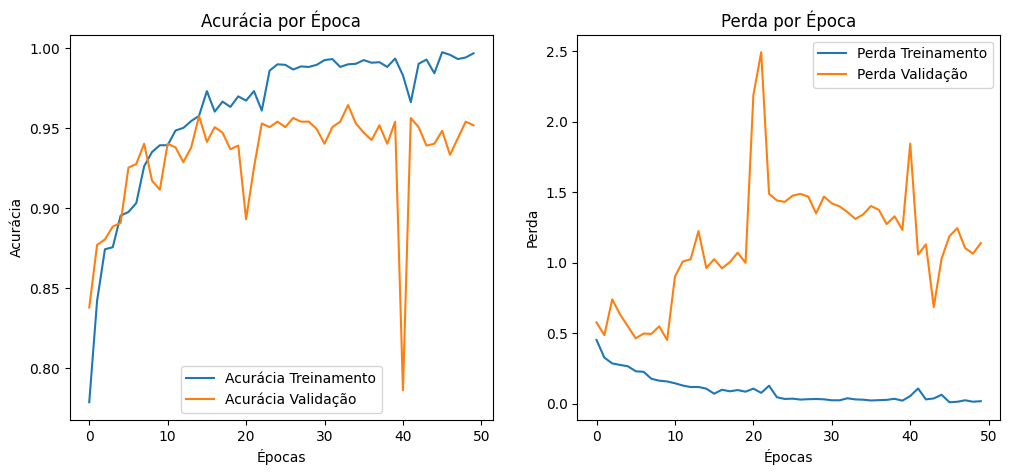

In [18]:
# Gráfico da acurácia e perda
plt.figure(figsize=(12, 5))

# Plotando a acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia por Época')

# Plotando a perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.title('Perda por Época')


plt.show()

## Salvando Modelo 

In [19]:
# Salvando o modelo
model.save('modelo_treinado.h5')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!
